# Phase 1 Documentation

**Architecture**


The architecture of a job recommendation project leveraging a knowledge graph holds paramount importance in its overall success. A well-crafted architecture is instrumental in efficiently processing and managing the intricate relationships within the knowledge graph, enabling effective data handling.
Here, we will be discussing architecture by using block diagram and sequence diagram.

**Block Diagram**

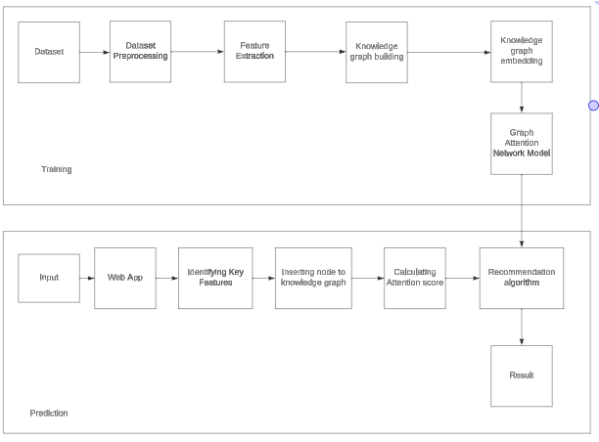

Above diagram shows the architecure for our project lets understand it briefly.
There are many different component in this diagram which are as follows:

**Data Collection:** Gather relevant data pertaining to jobs, users, and their interactions. This dataset may include information such as job descriptions, user profiles, skills, and historical user preferences.

Data Preprocessing:

**Cleaning and Formatting:** Cleanse the dataset of any inconsistencies, missing values, or irrelevant information. Standardize data formats and ensure uniformity.

**Normalization and Encoding:** Normalize numerical data and encode categorical variables to make the dataset suitable for machine learning algorithms.

**Identification of Features:**Determine the essential features that contribute to job recommendations. This may include skills, education, experience, and any other relevant attributes.

**Entity Recognition:** Identify entities such as jobs, skills, and users within the dataset.

**Relationship Modeling:** Define relationships between entities to build a knowledge graph that represents the connections and dependencies in the job ecosystem.

**Graph Construction:** Construct the knowledge graph based on the identified entities and relationships, forming a structured representation of the data.

Graph Attention Network (GAT):

**Graph Embeddings:** Utilize a Graph Attention Network to learn embeddings for nodes in the knowledge graph. GATs can capture complex relationships and dependencies between entities, enhancing the model's ability to understand contextual information.

**Attention Mechanism:** Leverage the attention mechanism to assign varying importance to different nodes in the graph, focusing on relevant information during the learning process.
Recommendation Algorithm:

**Algorithm Integration:** Integrate a recommendation algorithm that utilizes the knowledge graph and GAT embeddings to generate personalized job recommendations for users.

**Training and Optimization:** Train the recommendation algorithm on historical data, optimizing model parameters to improve accuracy and relevance.
Result Presentation:

**User Interface:** Design a user-friendly interface to present job recommendations to users. This could be a web application, mobile app, or any other platform where users can interact with the system.





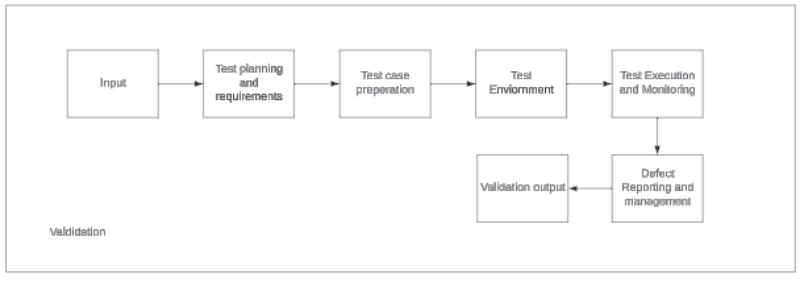

**Sequence** **Diagram**

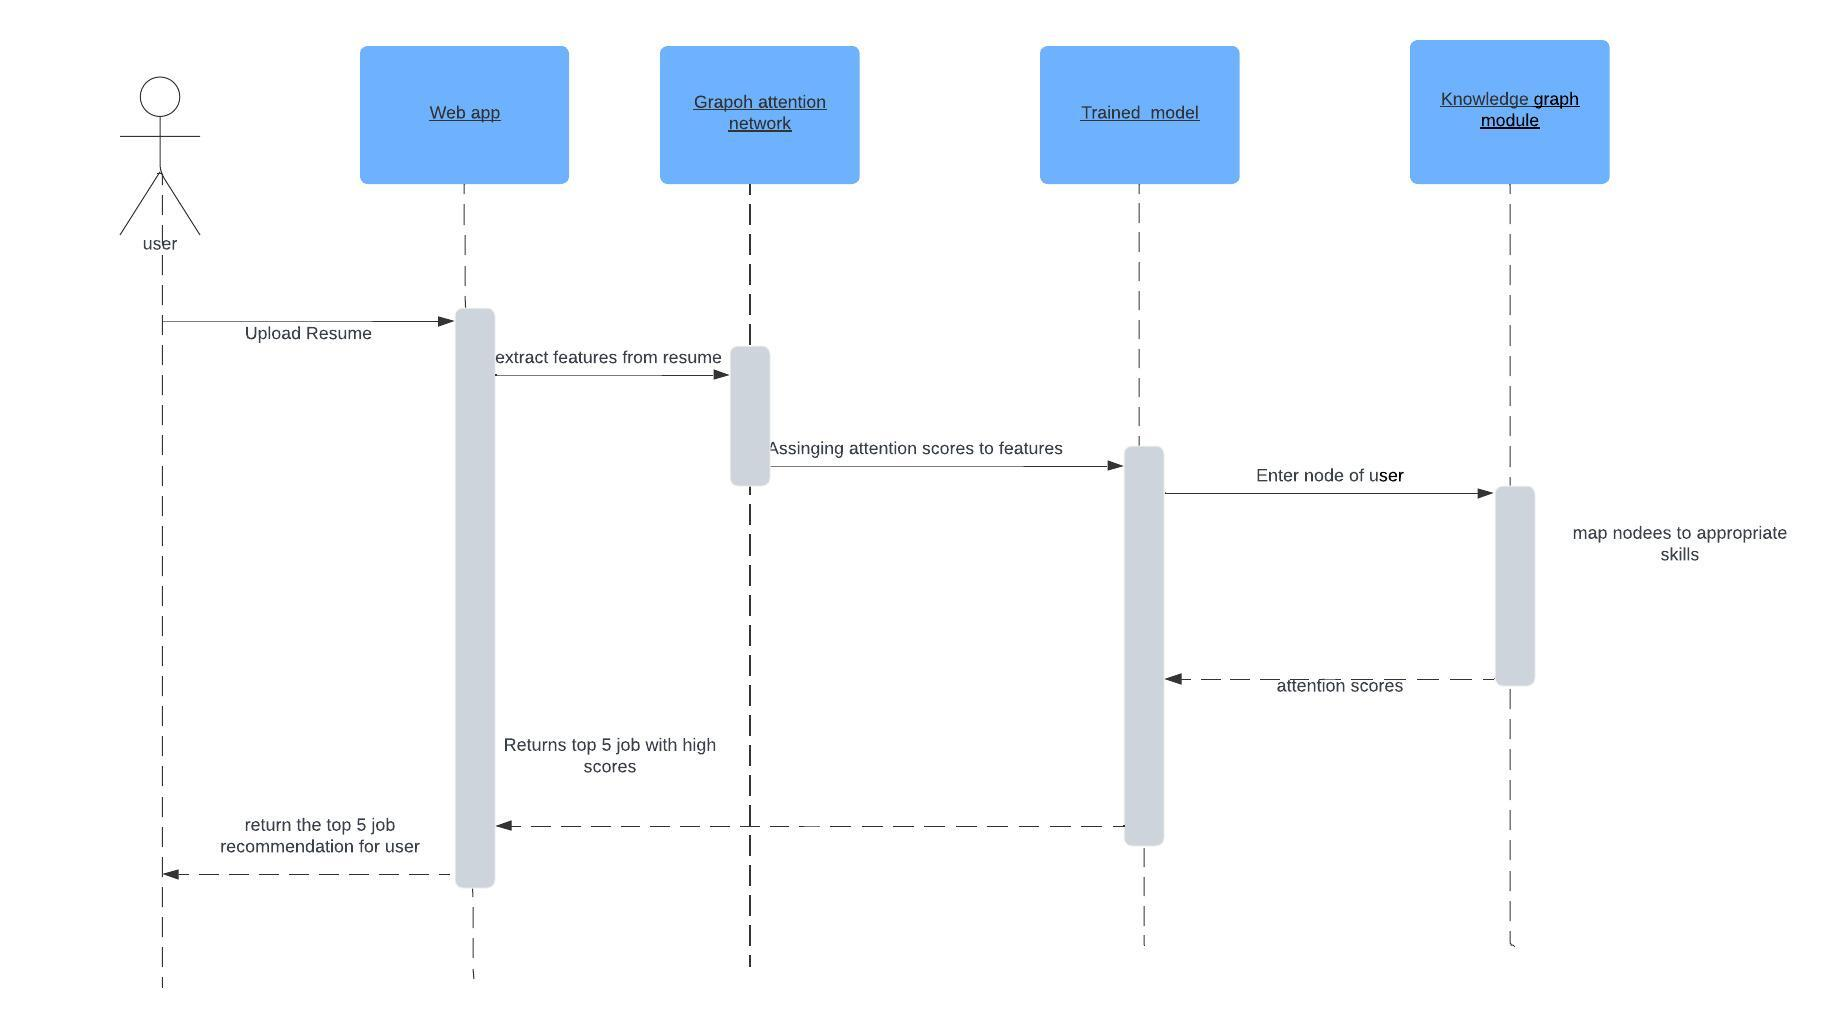

**User Uploads Resume:**

The user initiates the interaction by uploading their resume through the web application.

**Feature Extraction:**

The uploaded resume is processed to extract relevant features. This could include information such as skills, education, work experience, and other key attributes.

**Graph Attention Network (GAT) Scoring:**

The extracted features are then passed through a Graph Attention Network (GAT). The GAT assigns attention scores to each feature based on the relationships and dependencies modeled within the knowledge graph. This step helps in capturing the contextual importance of each feature.

**Trained Model Integration:**

The attention scores generated by the GAT are passed to a pre-trained recommendation model. This model has been trained on historical data to understand the correlation between user features, attention scores, and job recommendations.

**Knowledge Graph Node Mapping:**

The trained model utilizes the attention scores to enter the knowledge graph. Nodes in the graph represent various entities, such as skills, job roles, and user profiles. The model identifies the nodes that correspond to the user's skills and other relevant attributes.

**Propagation of Attention Scores:**

The attention scores obtained from the GAT are propagated to the nodes in the knowledge graph that represent the identified skills and attributes of the user. This process refines the attention scores at these nodes, capturing the user's specific context within the broader graph.

**Top Job Recommendations:**

The system retrieves the top job nodes from the knowledge graph based on the refined attention scores. These nodes represent job roles that are most relevant to the user's skills and experience.

**Result Presentation to User:**

The web application presents the top five job recommendations to the user in an easily understandable format. This could be a list of job titles, companies, or any other relevant information.

**Progress on various components**

As of now, the initial phases of the project have been successfully accomplished. The dataset preprocessing, feature identification, and relationship modeling stages have been completed, paving the way for the construction of the knowledge graph. The foundation has been laid for a comprehensive representation of entities and their interconnections within the job ecosystem.

Additionally, progress has commenced on the implementation of two crucial components: the Graph Attention Network (GAT) and the recommendation algorithm. The GAT will play a pivotal role in assigning contextual scores to features within the knowledge graph, while the recommendation algorithm will leverage these scores to provide personalized job suggestions. The ongoing work on these components marks a significant advancement towards the development of a sophisticated job recommendation system that harnesses the power of a knowledge graph.

# Phase 1 Implementation


1. The below code selects specific columns from a DataFrame named 'resumes_df' related to education, employment, coding experience, and skills.

2. It ensures that the 'HaveWorkedWith' column, containing skills information, is treated as strings.

3. Text data in the 'HaveWorkedWith' column is standardized by converting it to lowercase and removing leading/trailing whitespaces.

4. A new column 'Skills_List' is created, containing a list of individual skills for each row, obtained by splitting the 'HaveWorkedWith' column using semicolons.

In [ ]:
import re
import networkx as nx
import plotly.graph_objs as go
import plotly.io as pio
import pandas as pd

In [ ]:

# Sample loading of the dataset
resumes_df = pd.read_csv('/content/stackoverflow_full.csv')

# Remove irrelevant columns (if needed)
columns_to_keep = ['EdLevel', 'Employment', 'MainBranch', 'YearsCode', 'YearsCodePro', 'PreviousSalary', 'HaveWorkedWith', 'Employed']
resumes_df = resumes_df[columns_to_keep]

# Ensure all data in HaveWorkedWith is a string


# Standardize text data and split skills
resumes_df['HaveWorkedWith'] = resumes_df['HaveWorkedWith'].astype(str)
resumes_df['Skills_List'] = resumes_df['HaveWorkedWith'].apply(lambda x: [skill.strip().lower() for skill in x.split(';')])

# Now, 'Skills_List' contains a list of individual skills

# Further processing steps can be added as required


In [ ]:
resumes_df.head()

,EdLevel,Employment,MainBranch,YearsCode,YearsCodePro,PreviousSalary,HaveWorkedWith,Employed,Skills_List
0,Master,1,Dev,7,4,51552.0,C++;Python;Git;PostgreSQL,0,"[c++, python, git, postgresql]"
1,Undergraduate,1,Dev,12,5,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,1,"[bash/shell, html/css, javascript, node.js, sq..."
2,Master,1,Dev,15,6,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,0,"[c, c++, java, perl, ruby, git, ruby on rails]"
3,Undergraduate,1,Dev,9,6,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,0,"[bash/shell, html/css, javascript, php, ruby, ..."
4,PhD,0,NotDev,40,30,160932.0,C++;Python,0,"[c++, python]"


Our code uses the networkx library to build a graph (G) representing job seekers, skills, education levels, and years of coding. It iterates through rows in a DataFrame (resumes_df), creating nodes for job seekers with unique identifiers, skills, education levels, and years of coding. Edges are added to represent relationships such as 'has_skill', 'has_education', and 'has_years_coding'. The loop is set to process the first five job seekers, and the code can be extended for additional attributes.

In [ ]:
import networkx as nx

# Initialize the graph
G = nx.Graph()
count=0
# Example: Adding nodes for skills and job seekers
for index, row in resumes_df.iterrows():
    if count>=5:
      break
    count=count+1
    seeker_id = f"seeker_{index}"  # Creating a unique identifier for each job seeker
    G.add_node(seeker_id, type='job_seeker', attributes=row.to_dict())

    # Adding skill nodes and edges between job seeker and skills
    for skill in row['Skills_List']:
        if skill:  # Check if the skill is non-empty
            if not G.has_node(skill):
                G.add_node(skill, type='skill')
            G.add_edge(seeker_id, skill, relationship='has_skill')

    # Adding node and edge for education level
    if pd.notna(row['EdLevel']):
        G.add_node(row['EdLevel'], type='education')
        G.add_edge(seeker_id, row['EdLevel'], relationship='has_education')

    # Adding node and edge for years of coding
    if pd.notna(row['YearsCode']):
        years_code_node = f"years_{row['YearsCode']}"
        G.add_node(years_code_node, type='years_coding')
        G.add_edge(seeker_id, years_code_node, relationship='has_years_coding')

# Continue this pattern for other attributes like YearsCodePro, Employment, etc.


This below segment uses matplotlib and networkx to visualize a graph (G). It sets up a 12x12 plot, positions nodes using a spring layout, draws nodes with a size of 700 and black edges. Node labels are added, displaying each node's identifier. The final plot includes a title, turns off the axis, and displays the knowledge graph visualization.

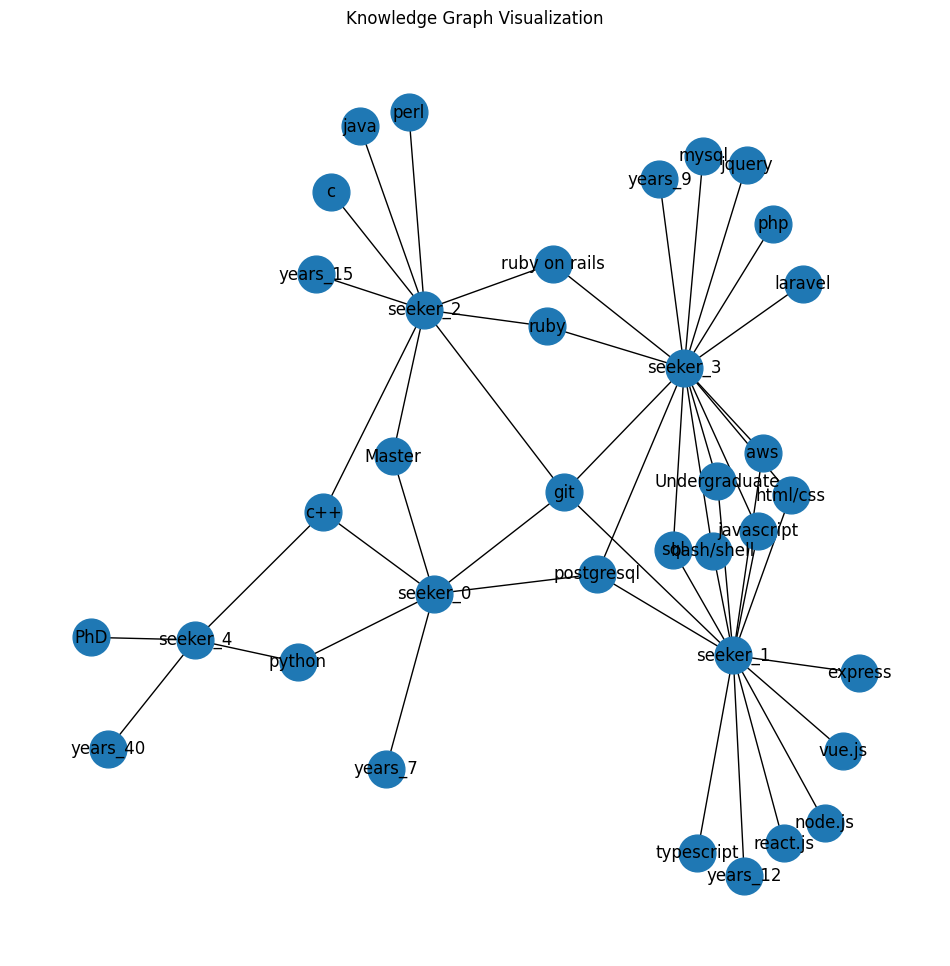

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G is your graph

# Draw the graph
plt.figure(figsize=(12, 12))  # Adjust the figure size as necessary
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black')

# Draw node labels
node_labels = {node[0]:node[0] for node in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.title("Knowledge Graph Visualization")
plt.axis('off')  # Turn off the axis
plt.show()


Now in the next step, we do the following :
Dataset Loading:

Reads a CSV file named 'naukri_data_science_jobs_india.csv' and loads it into a Pandas DataFrame named jd_df.
Experience Normalization Function:

Defines a function, extract_min_experience, that takes an experience string as input and extracts the minimum experience required. It uses regular expressions to match patterns like 'X-Y' and retrieves the 'X' value. If the input is empty or doesn't match the pattern, it returns None.
Applying the Function:

Applies the extract_min_experience function to the 'Job Experience' column of the DataFrame, creating a new column named 'MinExperience' that contains the extracted minimum experience values.
Data Type Conversion and Handling Nulls:

Converts the 'MinExperience' column to the Int64 data type in Pandas, allowing for integer values and handling missing values with pd.Int64Dtype().
Displaying the DataFrame:

Displays the first few rows of the DataFrame using the head() function, providing a glimpse of the data with the newly added 'MinExperience' column.

In [ ]:
import pandas as pd

# Sample loading of the dataset
jd_df = pd.read_csv('/content/naukri_data_science_jobs_india.csv')

# Load the dataset
# Replace 'path_to_your_dataset.csv' with the actual file path
import re
# Normalize job experience
def extract_min_experience(exp_string):
    if pd.isna(exp_string):
        return None
    if re.match(r'\d+-\d+', exp_string):
        return int(exp_string.split('-')[0])
    else:
        return None  # or set a default value

# Normalize job experience
jd_df['MinExperience'] = jd_df['Job Experience'].apply(extract_min_experience)
# jd_df['MinExperience'] = pd.to_numeric(jd_df['MinExperience'], errors='coerce')
jd_df['MinExperience'] = jd_df['MinExperience'].astype(pd.Int64Dtype())

jd_df.head()

# Now the DataFrame has a new column 'MinExperience' with the minimum years of experience

# Remove irrelevant columns (if needed)
# columns_to_keep = ['EdLevel', 'Employment', 'MainBranch', 'YearsCode', 'YearsCodePro', 'PreviousSalary', 'HaveWorkedWith', 'Employed']
# resumes_df = resumes_df[columns_to_keep]

# Ensure all data in HaveWorkedWith is a string


# Standardize text data and split skills
# resumes_df['HaveWorkedWith'] = resumes_df['HaveWorkedWith'].astype(str)
# resumes_df['Skills_List'] = resumes_df['HaveWorkedWith'].apply(lambda x: [skill.strip().lower() for skill in x.split(';')])

# Now, 'Skills_List' contains a list of individual skills

# Further processing steps can be added as required


,Job_Role,Company,Location,Job Experience,Skills/Description,MinExperience
0,Senior Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",3-6,"python, MLT, statistical modeling, machine lea...",3
1,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"Data Science, Machine learning, Python, Azure,...",5
2,Applied Data Scientist / ML Senior Engineer (P...,SAP India Pvt.Ltd,Bangalore/Bengaluru,5-10,"Python, IT Skills, Testing, Cloud, Product Man...",5
3,Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",1-4,"python, machine learning, Data Science, data a...",1
4,Data Scientist,Walmart,Bangalore/Bengaluru,4-8,"IT Skills, Python, Data Science, Machine Learn...",4



The next segment of code starts with sample data representing resumes with information on names, experiences, skills, and majors.
Graph Initialization:

It initializes a directed graph (knowledge_graph) using networkx.
Entity Extraction Function:

The extract_entities function is defined to extract information from each resume and add corresponding nodes and edges to the knowledge graph.
It uses regular expressions to extract experience details, splits skills, and adds nodes for 'Person', 'Major', 'Experience', 'Skill', and edges representing relationships like 'Has Experience' and 'Used Skill'.
Build the Knowledge Graph:

The code iterates through each resume, calling the extract_entities function for each one, which builds the knowledge graph.
Create Plotly Visualization:

It uses Plotly to create a visualization of the knowledge graph.
Nodes are positioned using the spring layout, and markers with text are created for each node.
Edges are represented by lines connecting nodes.
Display the Graph:

The final Plotly figure is created, and the graph is displayed with the console renderer.

In [ ]:

# Sample data (replace with your actual datasets)
resumes = [
    {
        'name': '11234',
        'experience': 'Software Engineer at IBM Inc, 2020-2022',
        'skills': 'Python, Java, SQL, Machine Learning,R,NodeJs,Excel',
        'major': 'Computer Science'
    },
    {
        'name': '11235',
        'experience': 'Data Analyst at amazon Corp, 2019-2021',
        'skills': 'Data Analysis, Excel, SQL',
        'major': 'Statistics'
    }
]

# Create a directed graph
knowledge_graph = nx.DiGraph()

# Function to extract entities and add them to the knowledge graph
def extract_entities(resume):
    # Extract experience, skills, and major
    experience = re.findall(r'([A-Za-z\s]+) at ([A-Za-z\s]+), (\d{4}-\d{4})', resume['experience'])
    skills = [skill.strip() for skill in resume['skills'].split(',')]
    major = resume['major']

    # Add nodes for each entity to the knowledge graph
    knowledge_graph.add_node(resume['name'], type='Person')
    knowledge_graph.add_node(major, type='Major')

    # Connect experience nodes to the person node
    for exp, company, date_range in experience:
        knowledge_graph.add_node(exp, type='Experience')
        knowledge_graph.add_edge(resume['name'], exp, relationship='Has Experience')
        knowledge_graph.add_edge(exp, company, relationship='Worked at')

    # Connect skill nodes to the experience nodes
    for skill in skills:
        knowledge_graph.add_node(skill, type='Skill')
        for exp, _, _ in experience:
            knowledge_graph.add_edge(exp, skill, relationship='Used Skill')

# Extract entities and build the knowledge graph for each resume
for resume in resumes:
    extract_entities(resume)

# Create a Plotly figure for visualization
pos = nx.spring_layout(knowledge_graph)
node_trace = go.Scatter(
    x=[pos[node][0] for node in knowledge_graph.nodes()],
    y=[pos[node][1] for node in knowledge_graph.nodes()],
    mode='markers+text',
    text=list(knowledge_graph.nodes()),
    textposition='bottom center',
    marker=dict(
        size=10,
        color='skyblue'
    )
)

edge_trace = go.Scatter(
    x=[],
    y=[],
    mode='lines',
    line=dict(width=1, color='gray')
)

for edge in knowledge_graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.x += tuple([x0, x1, None])
    edge_trace.y += tuple([y0, y1, None])

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    title='Knowledge Graph Visualization',
                    titlefont_size=16,
                ))

# Use the console renderer to display the graph in the terminal
pio.show(fig)


TO solve the error from previos segment of metadata mapping, the code is extended as a knowledge graph with additional job and resume records, then visualizes the updated graph using Plotly.

Knowledge Graph Extension:

The extract_entities function is invoked with additional job and resume records to update the existing knowledge graph.
Plotly Visualization:

The code creates a Plotly figure for visualization, positioning nodes using a spring layout.
Marker points with text labels are added for each node, and lines are drawn to represent edges between nodes.
Display the Graph:

The final Plotly figure is created, titled 'Knowledge Graph Visualization,' and displayed using the console renderer.
In summary, this code enriches the knowledge graph with new data and visually presents the updated relationships between job roles, skills, and individuals in a professional context.






In [ ]:
import re
import networkx as nx
import plotly.graph_objs as go
import plotly.io as pio

# Additional job records and resume records
# Additional job records
additional_job_records = [
    {
        'Job_Role': 'Data Scientist',
        'Company': 'Northface Consultancy Services Private Limited',
        'Location': 'Bangalore/Bengaluru (Whitefield)',
        'Job Experience': '3-6',
        'Skills/Description': 'database knowledge, R, Statistical Programming, Python, IT Skills, Machine Learning, Mathematics and Science background, SAS'
    },
    {
        'Job_Role': 'Senior Data Scientist',
        'Company': 'referral',
        'Location': 'Bangalore/Bengaluru',
        'Job Experience': '2-4',
        'Skills/Description': 'Computer science, Computer vision, Operations research, Product engineering, data science, Coding, Machine learning, Information retrieval'
    },
    {
        'Job_Role': 'Lead Python Data Scientist',
        'Company': 'Micello India Pvt Ltd',
        'Location': 'Bangalore/Bengaluru',
        'Job Experience': '8-12',
        'Skills/Description': 'CI / CD, Algorithms, Data Science, NoSQL, Data Structure, Python, Azure, AWS'
    },
    {
        'Job_Role': 'Senior Data Scientist Grade12',
        'Company': 'Flipkart',
        'Location': 'Bangalore/Bengaluru',
        'Job Experience': '5-10',
        'Skills/Description': 'Computer vision, GIT, Machine learning, JIRA, Python, deep learning, data science, Neural networks'
    },
    {
        'Job_Role': 'Data Scientist',
        'Company': 'Amazon',
        'Location': 'Seattle, Washington, United States',
        'Job Experience': '6-12',
        'Skills/Description': 'Machine learning, Deep Learning, Natural Language Processing, Recommender Systems, Python, TensorFlow, PyTorch, AWS'
    },
    {
        'Job_Role': 'Machine Learning Engineer',
        'Company': 'Google',
        'Location': 'Mountain View, California, United States',
        'Job Experience': '4-8',
        'Skills/Description': 'Machine Learning, Python, TensorFlow, PyTorch, Computer Vision, NLP, Google Cloud, AI'
    },
    {
        'Job_Role': 'Data Analyst',
        'Company': 'Microsoft',
        'Location': 'Redmond, Washington, United States',
        'Job Experience': '3-5',
        'Skills/Description': 'Data Analysis, SQL, Power BI, Excel, Data Visualization, Business Intelligence'
    },
    {
        'Job_Role': 'Software Engineer',
        'Company': 'Facebook',
        'Location': 'Menlo Park, California, United States',
        'Job Experience': '5-10',
        'Skills/Description': 'Software Development, Python, React, JavaScript, Full-Stack Development, Social Media'
    },
    {
        'Job_Role': 'Machine Learning Researcher',
        'Company': 'OpenAI',
        'Location': 'San Francisco, California, United States',
        'Job Experience': '3-7',
        'Skills/Description': 'Deep Learning, Reinforcement Learning, Natural Language Processing, AI Research, Python, PyTorch'
    },
    {
        'Job_Role': 'Data Engineer',
        'Company': 'Netflix',
        'Location': 'Los Gatos, California, United States',
        'Job Experience': '4-8',
        'Skills/Description': 'Big Data, Data Warehousing, ETL, Spark, Hadoop, SQL, Python, Streaming Data, Cloud Data Platforms'
    }
]

# Additional resume records
additional_resume_records = [
    {
        'Age': '>35',
        'Accessibility': 'Yes',
        'EdLevel': 'PhD',
        'Employment': '1',
        'Gender': 'Man',
        'MentalHealth': 'No',
        'MainBranch': 'Dev',
        'YearsCode': '20',
        'YearsCodePro': '15',
        'Country': 'United States of America',
        'PreviousSalary': '150000.0',
        'ComputerSkills': 'Python;R;SQL;Machine Learning;Data Mining;Natural Language Processing;Big Data;Deep Learning;Kubernetes;Docker',
        'Employed': '1'
    },
    {
        'Age': '<35',
        'Accessibility': 'No',
        'EdLevel': 'Master',
        'Employment': '1',
        'Gender': 'Woman',
        'MentalHealth': 'Yes',
        'MainBranch': 'Dev',
        'YearsCode': '10',
        'YearsCodePro': '6',
        'Country': 'Canada',
        'PreviousSalary': '90000.0',
        'ComputerSkills': 'Python;Data Analysis;Machine Learning;SQL;Tableau;Statistics;Data Visualization;Git',
        'Employed': '1'
    },
    {
        'Age': '<35',
        'Accessibility': 'No',
        'EdLevel': 'Master',
        'Employment': '1',
        'Gender': 'Man',
        'MentalHealth': 'No',
        'MainBranch': 'Dev',
        'YearsCode': '8',
        'YearsCodePro': '3',
        'Country': 'United Kingdom',
        'PreviousSalary': '60000.0',
        'ComputerSkills': 'Python;Data Science;Machine Learning;SQL;Git;Azure;Big Data;Deep Learning;NLP;TensorFlow',
        'Employed': '1'
    },
    {
        'Age': '<35',
        'Accessibility': 'No',
        'EdLevel': 'Bachelor',
        'Employment': '1',
        'Gender': 'Woman',
        'MentalHealth': 'No',
        'MainBranch': 'Dev',
        'YearsCode': '5',
        'YearsCodePro': '2',
        'Country': 'Australia',
        'PreviousSalary': '55000.0',
        'ComputerSkills': 'Java;Python;JavaScript;SQL;Git;HTML/CSS;React;Node.js;Express;MongoDB;Angular',
        'Employed': '1'
    },
    {
        'Age': '<35',
        'Accessibility': 'No',
        'EdLevel': 'Master',
        'Employment': '1',
        'Gender': 'Man',
        'MentalHealth': 'No',
        'MainBranch': 'Dev',
        'YearsCode': '12',
        'YearsCodePro': '6',
        'Country': 'India',
        'PreviousSalary': '80000.0',
        'ComputerSkills': 'Java;Python;C++;Django;SQL;Git;Machine Learning;Data Analysis;HTML/CSS;JavaScript;Angular;React;Node.js',
        'Employed': '1'
    },
    {
        'Age': '<35',
        'Accessibility': 'No',
        'EdLevel': 'Bachelor',
        'Employment': '1',
        'Gender': 'Woman',
        'MentalHealth': 'Yes',
        'MainBranch': 'Dev',
        'YearsCode': '5',
        'YearsCodePro': '2',
        'Country': 'Germany',
        'PreviousSalary': '60000.0',
        'ComputerSkills': 'Python;Django;JavaScript;React;Git;SQL;HTML/CSS;Data Science;Machine Learning;Data Analysis',
        'Employed': '1'
    },
    {
        'Age': '<35',
        'Accessibility': 'No',
        'EdLevel': 'Master',
        'Employment': '1',
        'Gender': 'Man',
        'MentalHealth': 'No',
        'MainBranch': 'Dev',
        'YearsCode': '8',
        'YearsCodePro': '4',
        'Country': 'France',
        'PreviousSalary': '50000.0',
        'ComputerSkills': 'Python;JavaScript;React;Git;SQL;HTML/CSS;Node.js;Angular;Vue.js;Data Science;Machine Learning;Data Analysis',
        'Employed': '1'
    },
    {
        'Age': '<35',
        'Accessibility': 'No',
        'EdLevel': 'Bachelor',
        'Employment': '1',
        'Gender': 'Man',
        'MentalHealth': 'No',
        'MainBranch': 'Dev',
        'YearsCode': '10',
        'YearsCodePro': '6',
        'Country': 'Netherlands',
        'PreviousSalary': '70000.0',
        'ComputerSkills': 'Python;Java;JavaScript;React;Git;SQL;HTML/CSS;Node.js;Data Science;Machine Learning;Data Analysis',
        'Employed': '1'
    },
    {
        'Age': '<35',
        'Accessibility': 'No',
        'EdLevel': 'Master',
        'Employment': '1',
        'Gender': 'Woman',
        'MentalHealth': 'No',
        'MainBranch': 'Dev',
        'YearsCode': '6',
        'YearsCodePro': '3',
        'Country': 'Brazil',
        'PreviousSalary': '45000.0',
        'ComputerSkills': 'Java;Python;JavaScript;SQL;Git;HTML/CSS;Node.js;Data Science;Machine Learning;Data Analysis',
        'Employed': '1'
    },
]

# Extend the knowledge graph with additional records
extract_entities(additional_job_records, additional_resume_records)

# Create a Plotly figure for visualization
pos = nx.spring_layout(knowledge_graph)
node_trace = go.Scatter(
    x=[pos[node][0] for node in knowledge_graph.nodes()],
    y=[pos[node][1] for node in knowledge_graph.nodes()],
    mode='markers+text',
    text=list(knowledge_graph.nodes()),
    textposition='bottom center',
    marker=dict(
        size=10,
        color='skyblue'
    )
)

edge_trace = go.Scatter(
    x=[],
    y=[],
    mode='lines',
    line=dict(width=1, color='gray')
)

for edge in knowledge_graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.x += tuple([x0, x1, None])
    edge_trace.y += tuple([y0, y1, None])

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    title='Knowledge Graph Visualization',
                    titlefont_size=16,
                ))

# Use the console renderer to display the graph in the terminal
pio.show(fig)



This section of the code starts with additional job and resume records, representing roles, companies, and skills.
Knowledge Graph Initialization:

A directed graph (knowledge_graph) is created using networkx.
Entity Extraction Function:

The extract_entities function is defined to extract information from job and resume records and add corresponding nodes and edges to the knowledge graph.
Nodes represent job roles, companies, skills, age, and education level. Edges capture relationships such as 'At Company', 'Requires Skill', 'Has Skill', etc.
Build the Knowledge Graph:

The code invokes the extract_entities function with the provided job and resume records, populating the knowledge graph with nodes and edges based on the extracted entities.
Plotly Visualization:

It uses Plotly to create a visualization of the knowledge graph.
Nodes are positioned using the spring layout, and markers with text labels are added for each node. Lines are drawn to represent edges between nodes.
Display the Graph:

The final Plotly figure is created, titled 'Knowledge Graph Visualization,' and displayed using the console renderer.

In [ ]:
import re
import networkx as nx
import plotly.graph_objs as go
import plotly.io as pio

# Additional job records and resume records
job_records = [
    {
        'Job_Role': 'Senior Data Scientist',
        'Company': 'Walmart',
        'Location': 'Bangalore/Bengaluru',
        'Job Experience': '5-9',
        'Skills/Description': 'Data Science, Machine learning, Python, Azure, BigQuery, GCP, PySpark, tensorflow'
    },
    {
        'Job_Role': 'Applied Data Scientist / ML Senior Engineer',
        'Company': 'SAP India Pvt.Ltd',
        'Location': 'Bangalore/Bengaluru',
        'Job Experience': '5-10',
        'Skills/Description': 'Python, IT Skills, Testing, Cloud, Product Management, SAP, Cloud computing, NLP'
    },
    # Add more job records here...
]

resume_records = [
    {
        'Age': '<35',
        'Accessibility': 'No',
        'EdLevel': 'Master',
        'Employment': '1',
        'Gender': 'Man',
        'MentalHealth': 'No',
        'MainBranch': 'Dev',
        'YearsCode': '7',
        'YearsCodePro': '4',
        'Country': 'Sweden',
        'PreviousSalary': '51552.0',
        'ComputerSkills': 'C++;Python;Git;PostgreSQL',
        'Employed': '4'
    },
    {
        'Age': '<35',
        'Accessibility': 'No',
        'EdLevel': 'Undergraduate',
        'Employment': '1',
        'Gender': 'Man',
        'MentalHealth': 'No',
        'MainBranch': 'Dev',
        'YearsCode': '12',
        'YearsCodePro': '5',
        'Country': 'Spain',
        'PreviousSalary': '46482.0',
        'ComputerSkills': 'Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;TypeScript;Git;Express;React.js;Vue.js;AWS;PostgreSQL',
        'Employed': '1'
    },
    # Add more resume records here...
]

# Create a directed graph for the knowledge graph
knowledge_graph = nx.DiGraph()

# Function to extract entities and add them to the knowledge graph
def extract_entities(job_records, resume_records):
    # Extract entities from job records and add them to the knowledge graph
    for job_record in job_records:
        job_role = job_record['Job_Role']
        company = job_record['Company']
        skills = [skill.strip() for skill in job_record['Skills/Description'].split(', ')]

        # Add nodes for job role, company, and skills
        knowledge_graph.add_node(job_role, type='Job Role')
        knowledge_graph.add_node(company, type='Company')
        for skill in skills:
            knowledge_graph.add_node(skill, type='Skill')

        # Connect job role to company and skills
        knowledge_graph.add_edge(job_role, company, relationship='At Company')
        for skill in skills:
            knowledge_graph.add_edge(job_role, skill, relationship='Requires Skill')

    # Extract entities from resume records and add them to the knowledge graph
    for resume_record in resume_records:
        age = resume_record['Age']
        ed_level = resume_record['EdLevel']
        skills = [skill.strip() for skill in resume_record['ComputerSkills'].split(';')]

        # Add nodes for age, education level, and skills
        knowledge_graph.add_node(age, type='Age')
        knowledge_graph.add_node(ed_level, type='Education Level')
        for skill in skills:
            knowledge_graph.add_node(skill, type='Skill')

        # Connect age and education level to skills
        for skill in skills:
            knowledge_graph.add_edge(age, skill, relationship='Has Skill')
            knowledge_graph.add_edge(ed_level, skill, relationship='Has Skill')

# Extract entities and build the knowledge graph
extract_entities(job_records, resume_records)

# Create a Plotly figure for visualization
pos = nx.spring_layout(knowledge_graph)
node_trace = go.Scatter(
    x=[pos[node][0] for node in knowledge_graph.nodes()],
    y=[pos[node][1] for node in knowledge_graph.nodes()],
    mode='markers+text',
    text=list(knowledge_graph.nodes()),
    textposition='bottom center',
    marker=dict(
        size=10,
        color='skyblue'
    )
)

edge_trace = go.Scatter(
    x=[],
    y=[],
    mode='lines',
    line=dict(width=1, color='gray')
)

for edge in knowledge_graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.x += tuple([x0, x1, None])
    edge_trace.y += tuple([y0, y1, None])

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    title='Knowledge Graph Visualization',
                    titlefont_size=16,
                ))

# Use the console renderer to display the graph in the terminal
pio.show(fig)


Graph Initialization:

The code initializes a directed graph G using networkx (nx.DiGraph()).
Resume Data:

Sample resume data is provided, each containing information about a person's name, experience, skills, and major.
Entity Extraction Function:

The extract_entities function is defined to extract entities (experience, skills, and major) from a resume and add corresponding nodes and edges to the knowledge graph.
It uses regular expressions to extract information about experience and then adds nodes for the person, major, experiences, skills, and edges representing relationships between them.
Building the Knowledge Graph:

The code iterates through each resume in the 'resumes' list, invoking the extract_entities function for each resume to populate the knowledge graph (G).
Graph Visualization:

The code uses matplotlib to visualize the knowledge graph. It sets up a figure with a specified size and calculates positions for all nodes using the spring layout algorithm (nx.spring_layout(G)).
Nodes are drawn using nx.draw_networkx_nodes, edges using nx.draw_networkx_edges, and node labels using nx.draw_networkx_labels.
Display the Graph:

The final graph is displayed using plt.show() with a title, and the axis is turned off for a cleaner visualization.

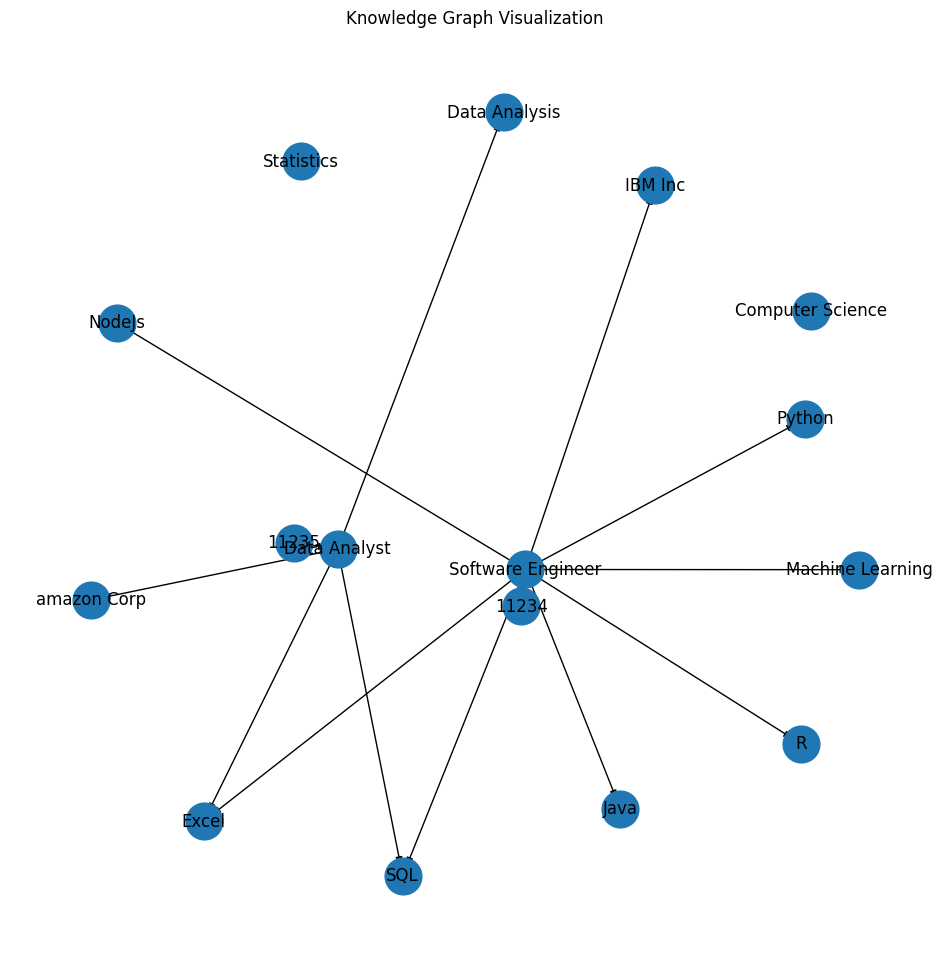

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import re

# Create a directed graph
G = nx.DiGraph()

# Sample data (replace with your actual datasets)
resumes = [
    {
        'name': '11234',
        'experience': 'Software Engineer at IBM Inc, 2020-2022',
        'skills': 'Python, Java, SQL, Machine Learning,R,NodeJs,Excel',
        'major': 'Computer Science'
    },
    {
        'name': '11235',
        'experience': 'Data Analyst at amazon Corp, 2019-2021',
        'skills': 'Data Analysis, Excel, SQL',
        'major': 'Statistics'
    }
]

# Function to extract entities and add them to the knowledge graph
def extract_entities(resume):
    # Extract experience, skills, and major
    experience = re.findall(r'([A-Za-z\s]+) at ([A-Za-z\s]+), (\d{4}-\d{4})', resume['experience'])
    skills = [skill.strip() for skill in resume['skills'].split(',')]
    major = resume['major']

    # Add nodes for each entity to the knowledge graph
    G.add_node(resume['name'], type='Person')
    G.add_node(major, type='Major')

    # Connect experience nodes to the person node
    for exp, company, date_range in experience:
        G.add_node(exp, type='Experience')
        G.add_edge(resume['name'], exp, relationship='Has Experience')
        G.add_edge(exp, company, relationship='Worked at')

    # Connect skill nodes to the experience nodes
    for skill in skills:
        G.add_node(skill, type='Skill')
        for exp, _, _ in experience:
            G.add_edge(exp, skill, relationship='Used Skill')

# Extract entities and build the knowledge graph for each resume
for resume in resumes:
    extract_entities(resume)

# Assuming G is your graph

# Draw the graph
plt.figure(figsize=(12, 12))  # Adjust the figure size as necessary
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black')

# Draw node labels
node_labels = {node[0]: node[0] for node in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.title("Knowledge Graph Visualization")
plt.axis('off')  # Turn off the axis
plt.show()


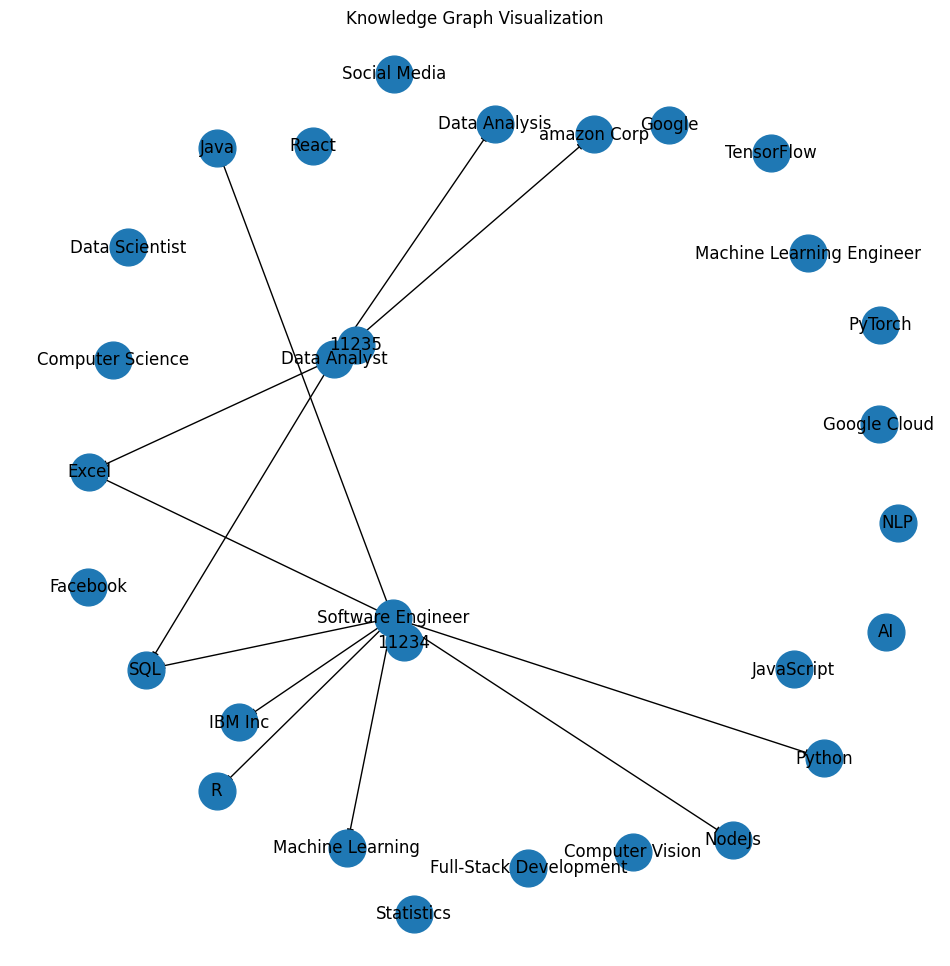

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import re

# Create a directed graph
G = nx.DiGraph()

# Sample resume data
resumes = [
    {
        'name': '11234',
        'experience': 'Software Engineer at IBM Inc, 2020-2022',
        'skills': 'Python, Java, SQL, Machine Learning,R,NodeJs,Excel',
        'major': 'Computer Science'
    },
    {
        'name': '11235',
        'experience': 'Data Analyst at amazon Corp, 2019-2021',
        'skills': 'Data Analysis, Excel, SQL',
        'major': 'Statistics'
    }
]

# Sample job data
jobs = [
    {
        'Job_Role': 'Data Scientist',
        'Company': 'Google',
        'Location': 'Mountain View, California, United States',
        'Job Experience': '4-8',
        'Skills/Description': 'Machine Learning, Python, TensorFlow, PyTorch, Computer Vision, NLP, Google Cloud, AI'
    },
    {
        'Job_Role': 'Machine Learning Engineer',
        'Company': 'Facebook',
        'Location': 'Menlo Park, California, United States',
        'Job Experience': '5-10',
        'Skills/Description': 'Machine Learning, Python, React, JavaScript, Full-Stack Development, Social Media'
    }
]

# Function to extract entities and add them to the knowledge graph
def extract_entities(resume):
    # Extract experience, skills, and major
    experience = re.findall(r'([A-Za-z\s]+) at ([A-Za-z\s]+), (\d{4}-\d{4})', resume['experience'])
    skills = [skill.strip() for skill in resume['skills'].split(',')]
    major = resume['major']

    # Add nodes for each entity to the knowledge graph
    G.add_node(resume['name'], type='Person')
    G.add_node(major, type='Major')

    # Connect experience nodes to the person node
    for exp, company, date_range in experience:
        G.add_node(exp, type='Experience')
        G.add_edge(resume['name'], exp, relationship='Has Experience')
        G.add_edge(exp, company, relationship='Worked at')

    # Connect skill nodes to the experience nodes
    for skill in skills:
        G.add_node(skill, type='Skill')
        for exp, _, _ in experience:
            G.add_edge(exp, skill, relationship='Used Skill')

# Function to extract entities and add them to the knowledge graph from job data
def extract_job_entities(job):
    # Extract job experience and skills
    experience = re.findall(r'([A-Za-z\s]+) at ([A-Za-z\s]+), (\d{1,2}-\d{1,2})', job['Job Experience'])
    skills = [skill.strip() for skill in job['Skills/Description'].split(',')]

    # Add nodes for each entity to the knowledge graph
    G.add_node(job['Job_Role'], type='Job Role')
    G.add_node(job['Company'], type='Company')

    # Connect experience nodes to the job role node
    for exp, company, date_range in experience:
        G.add_node(exp, type='Experience')
        G.add_edge(job['Job_Role'], exp, relationship='Requires Experience')
        G.add_edge(exp, company, relationship='At Company')

    # Connect skill nodes to the experience nodes
    for skill in skills:
        G.add_node(skill, type='Skill')
        for exp, _, _ in experience:
            G.add_edge(exp, skill, relationship='Requires Skill')

# Extract entities and build the knowledge graph for each resume
for resume in resumes:
    extract_entities(resume)

# Extract entities and build the knowledge graph for each job
for job in jobs:
    extract_job_entities(job)

# Draw the graph
plt.figure(figsize=(12, 12))  # Adjust the figure size as necessary
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black')

# Draw node labels
node_labels = {node[0]: node[0] for node in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.title("Knowledge Graph Visualization")
plt.axis('off')  # Turn off the axis
plt.show()


In [ ]:
import pandas as pd
import networkx as nx

# Load the datasets
job_posting_df = pd.read_csv('/path/to/job_posting_dataset.csv')
resume_df = pd.read_csv('/path/to/resume_dataset.csv')

# Create a new graph
graph = nx.Graph()

# Adding nodes for job titles from job postings
for job_title in job_posting_df['Job Title'].unique():
    graph.add_node(job_title, type='job_title')

# Adding nodes for skills from both datasets
all_skills = set()
for skills in job_posting_df['Required Skills']:
    all_skills.update(skills.split(', '))
for skills in resume_df['Skills']:
    all_skills.update(skills.split(', '))
for skill in all_skills:
    graph.add_node(skill, type='skill')

# Adding nodes for candidates
for candidate in resume_df['Name']:
    graph.add_node(candidate, type='candidate')

# Adding nodes for locations from both datasets
all_locations = set(job_posting_df['Location'].unique()).union(resume_df['Location'].unique())
for location in all_locations:
    graph.add_node(location, type='location')

# Adding nodes for experiences
all_experiences = set(job_posting_df['Experience Needed'].unique()).union(resume_df['Experience'].unique())
for experience in all_experiences:
    graph.add_node(experience, type='experience')

# Adding nodes for majors
all_majors = set(job_posting_df['Major'].unique()).union(resume_df['Major'].unique())
for major in all_majors:
    graph.add_node(major, type='major')

# Adding edges for job postings
for _, row in job_posting_df.iterrows():
    for skill in row['Required Skills'].split(', '):
        graph.add_edge(row['Job Title'], skill, type='requires_skill')
    graph.add_edge(row['Job Title'], row['Location'], type='located_at')
    graph.add_edge(row['Job Title'], row['Experience Needed'], type='requires_experience')
    graph.add_edge(row['Job Title'], row['Major'], type='requires_major')

# Adding edges for candidates
for _, row in resume_df.iterrows():
    for skill in row['Skills'].split(', '):
        graph.add_edge(row['Name'], skill, type='has_skill')
    graph.add_edge(row['Name'], row['Location'], type='located_at')
    graph.add_edge(row['Name'], row['Experience'], type='has_experience')
    graph.add_edge(row['Name'], row['Major'], type='has_major')

# Basic information about the graph
graph_info = nx.info(graph)
print(graph_info)


FileNotFoundError: ignored

In [ ]:
import networkx as nx

# Create a new graph
G = nx.Graph()

# Adding nodes for job titles
for job_title in job_posting_df_enhanced['Job Title'].unique():
    G.add_node(job_title, type='job_title')

# Adding nodes for skills
skills_set = set()
for skills in job_posting_df_enhanced['Required Skills']:
    skills_set.update(skills.split(', '))
for skills in resume_df_enhanced['Skills']:
    skills_set.update(skills.split(', '))
for skill in skills_set:
    G.add_node(skill, type='skill')

# Adding nodes for candidates
for candidate in resume_df_enhanced['Name']:
    G.add_node(candidate, type='candidate')

# Adding edges for job requires skill
for _, row in job_posting_df_enhanced.iterrows():
    for skill in row['Required Skills'].split(', '):
        G.add_edge(row['Job Title'], skill, type='requires')

# Adding edges for candidate has skill
for _, row in resume_df_enhanced.iterrows():
    for skill in row['Skills'].split(', '):
        G.add_edge(row['Name'], skill, type='has')

# Display basic information about the graph
graph_info = nx.info(G)
graph_info


AttributeError: ignored

In [ ]:
import pandas as pd
import networkx as nx

# Load the datasets
job_posting_df = pd.read_csv('/content/new_synthetic_job_posting_dataset.csv')
resume_df = pd.read_csv('/content/new_synthetic_resume_dataset.csv')

# Create a new graph
graph = nx.Graph()

# Adding nodes for job titles from job postings
for job_title in job_posting_df['Job Title'].unique():
    graph.add_node(job_title, type='job_title')

# Adding nodes for skills from both datasets
all_skills = set()
for skills in job_posting_df['Required Skills']:
    all_skills.update(skills.split(', '))
for skills in resume_df['Skills']:
    all_skills.update(skills.split(', '))
for skill in all_skills:
    graph.add_node(skill, type='skill')

# Adding nodes for candidates
for candidate in resume_df['Name']:
    graph.add_node(candidate, type='candidate')

# Adding nodes for locations from both datasets
all_locations = set(job_posting_df['Location'].unique()).union(resume_df['Location'].unique())
for location in all_locations:
    graph.add_node(location, type='location')

# Adding nodes for experiences
all_experiences = set(job_posting_df['Experience Needed'].unique()).union(resume_df['Experience'].unique())
for experience in all_experiences:
    graph.add_node(experience, type='experience')

# Adding nodes for majors
all_majors = set(job_posting_df['Major'].unique()).union(resume_df['Major'].unique())
for major in all_majors:
    graph.add_node(major, type='major')

# Adding edges for job postings
for _, row in job_posting_df.iterrows():
    for skill in row['Required Skills'].split(', '):
        graph.add_edge(row['Job Title'], skill, type='requires_skill')
    graph.add_edge(row['Job Title'], row['Location'], type='located_at')
    graph.add_edge(row['Job Title'], row['Experience Needed'], type='requires_experience')
    graph.add_edge(row['Job Title'], row['Major'], type='requires_major')

# Adding edges for candidates
for _, row in resume_df.iterrows():
    for skill in row['Skills'].split(', '):
        graph.add_edge(row['Name'], skill, type='has_skill')
    graph.add_edge(row['Name'], row['Location'], type='located_at')
    graph.add_edge(row['Name'], row['Experience'], type='has_experience')
    graph.add_edge(row['Name'], row['Major'], type='has_major')

# Basic information about the graph
# graph_info = nx.info(graph)
# print(graph_info)



This code creates a knowledge graph using job posting and resume datasets. It represents entities like job titles, skills, candidates, locations, experiences, majors, and job IDs as nodes. Relationships, depicted as edges, connect entities appropriately. Colors distinguish between different node types, and a spring layout algorithm organizes the graph visually. The resulting knowledge graph provides a structured representation of data relationships, aiding interpretation.

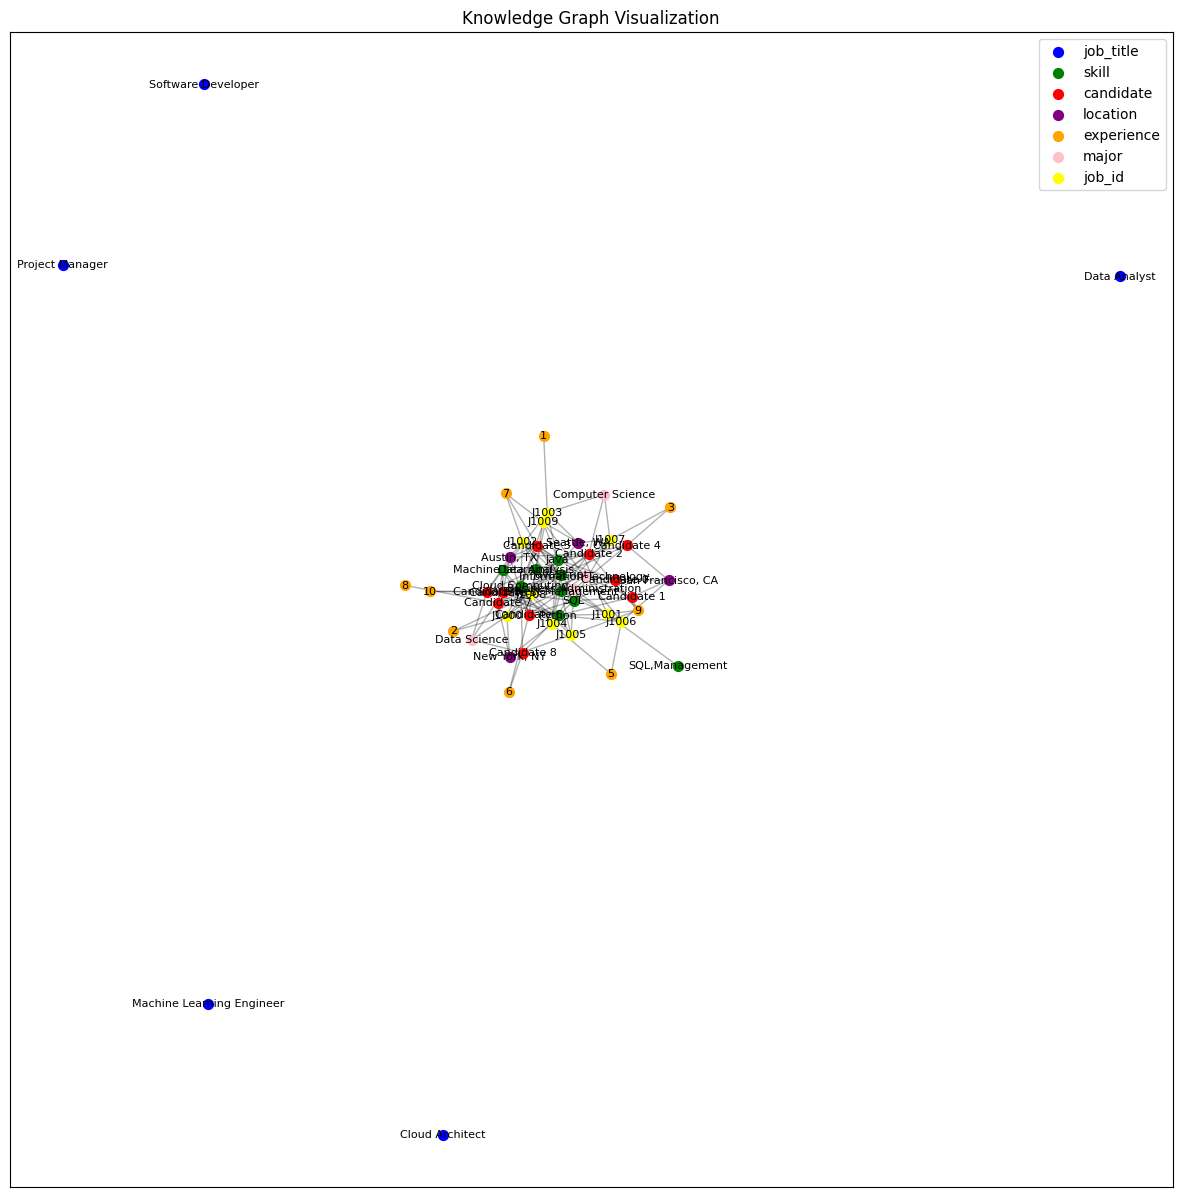

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the datasets
new_job_posting_df = pd.read_csv('/content/new_synthetic_job_posting_dataset.csv')
new_resume_df = pd.read_csv('/content/new_synthetic_resume_dataset.csv')

# Create a new graph
new_graph = nx.Graph()

# Adding nodes for job titles from job postings
for job_title in new_job_posting_df['Job Title'].unique():
    new_graph.add_node(job_title, type='job_title')

# Adding nodes for skills from both datasets
new_all_skills = set()
for skills in new_job_posting_df['Required Skills']:
    new_all_skills.update(skills.split(', '))
for skills in new_resume_df['Skills']:
    new_all_skills.update(skills.split(', '))
for skill in new_all_skills:
    new_graph.add_node(skill, type='skill')

# Adding nodes for candidates
for candidate in new_resume_df['Name']:
    new_graph.add_node(candidate, type='candidate')

# Adding nodes for locations from both datasets
new_all_locations = set(new_job_posting_df['Location'].unique()).union(new_resume_df['Location'].unique())
for location in new_all_locations:
    new_graph.add_node(location, type='location')

# Adding nodes for experiences
new_all_experiences = set(new_job_posting_df['Experience Needed'].unique()).union(new_resume_df['Experience'].unique())
for experience in new_all_experiences:
    new_graph.add_node(experience, type='experience')

# Adding nodes for majors
new_all_majors = set(new_job_posting_df['Major'].unique()).union(new_resume_df['Major'].unique())
for major in new_all_majors:
    new_graph.add_node(major, type='major')

# Adding nodes for Job IDs and their respective properties
for _, row in new_job_posting_df.iterrows():
    job_id = row['Job ID']
    required_skills = row['Required Skills'].split(', ')
    experience_needed = row['Experience Needed']
    major = row['Major']
    location = row['Location']

    # Add node for each job posting using Job ID
    new_graph.add_node(job_id, type='job_id', title=row['Job Title'], major=major, location=location, experience=experience_needed)

    # Add edges for required skills, experience, major, and location
    for skill in required_skills:
        new_graph.add_edge(job_id, skill, type='requires_skill')
    new_graph.add_edge(job_id, experience_needed, type='requires_experience')
    new_graph.add_edge(job_id, major, type='requires_major')
    new_graph.add_edge(job_id, location, type='located_at')

# Adding edges for candidates
for _, row in new_resume_df.iterrows():
    for skill in row['Skills'].split(', '):
        new_graph.add_edge(row['Name'], skill, type='has_skill')
    new_graph.add_edge(row['Name'], row['Location'], type='located_at')
    new_graph.add_edge(row['Name'], row['Experience'], type='has_experience')
    new_graph.add_edge(row['Name'], row['Major'], type='has_major')

# Define colors for different types of nodes for visualization
color_map = {
    'job_title': 'blue',
    'skill': 'green',
    'candidate': 'red',
    'location': 'purple',
    'experience': 'orange',
    'major': 'pink',
    'job_id': 'yellow'
}

# Generate a layout for our nodes
layout = nx.spring_layout(new_graph, scale=2)

# Drawing the graph
plt.figure(figsize=(15, 15))
nx.draw_networkx_edges(new_graph, pos=layout, alpha=0.3)

for node_type, color in color_map.items():
    nx.draw_networkx_nodes(
        new_graph,
        pos=layout,
        nodelist=[n for n, attrdict in new_graph.nodes(data=True) if attrdict['type'] == node_type],
        node_color=color,
        label=node_type,
        node_size=50
    )

nx.draw_networkx_labels(new_graph, pos=layout, font_size=8)

# Show legend
plt.legend(scatterpoints=1)

# Show plot
plt.title("Knowledge Graph Visualization")
plt.show()


Now in this sesion, This code defines a function find_matching_job_for_candidate_based_on_skills_exp that identifies suitable job opportunities for a given candidate within a knowledge graph. The function takes the graph and the candidate's name as input.

First, it extracts the candidate's skills and experience from the graph by traversing the edges connected to the candidate node. It distinguishes between skills and experience based on node types.

Next, it iterates over all job nodes in the graph, specifically those with the type 'job_id'. For each job, it retrieves the required skills and experience. The code then checks if the candidate possesses all the required skills and if their experience matches the job's specified experience.

If both skill and experience criteria are met, the job is considered suitable, and its job ID is added to the set of suitable_jobs.

In [ ]:
def find_matching_job_for_candidate_based_on_skills_exp(graph, candidate_name):
    # Extract candidate's skills and experience
    candidate_skills = set(n for n, attr in graph.edges(candidate_name) if graph.nodes[n]['type'] == 'skill')
    candidate_experience = next((graph.nodes[n]['name'] for n, attr in graph.edges(candidate_name) if graph.nodes[n]['type'] == 'experience'), None)
    print(candidate_skills)

    suitable_jobs = set()
    for job_id in graph.nodes(data=True):
        if job_id[1]['type'] == 'job_id':
            job_skills = set(n for n, attr in graph.edges(job_id[0]) if graph.nodes[n]['type'] == 'skill')
            job_experience = graph.nodes[job_id[0]]['experience']
            print("here")
            # Check if the candidate's skills match the job's required skills
            skill_match = candidate_skills.issubset(job_skills)
            # Check if the candidate's experience matches the job's required experience
            experience_match = candidate_experience == job_experience

            if skill_match and experience_match:
                suitable_jobs.add(job_id[0])

    return suitable_jobs

# Finding a matching job for Candidate 1
candidate_name = "Candidate 1"
matching_jobs = find_matching_job_for_candidate_based_on_skills_exp(new_graph, candidate_name)

matching_jobs


set()
here
here
here
here
here
here
here
here
here
here


set()

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the datasets
new_job_posting_df = pd.read_csv('/content/new_synthetic_job_posting_dataset.csv')
new_resume_df = pd.read_csv('/content/new_synthetic_resume_dataset.csv')

# Create a new graph
updated_graph_with_ids = nx.Graph()

# Adding nodes for job titles and skills from both datasets
for job_title in new_job_posting_df['Job Title'].unique():
    updated_graph_with_ids.add_node(job_title, type='job_title')

for skill in new_all_skills:
    updated_graph_with_ids.add_node(skill, type='skill')

# Adding nodes for candidates using Candidate ID
for _, row in new_resume_df.iterrows():
    updated_graph_with_ids.add_node(row['Candidate ID'], type='candidate', name=row['Name'])

# Adding nodes for other entities
for location in new_all_locations:
    updated_graph_with_ids.add_node(location, type='location')

for experience in new_all_experiences:
    updated_graph_with_ids.add_node(experience, type='experience')

for major in new_all_majors:
    updated_graph_with_ids.add_node(major, type='major')

# Adding nodes and edges for job postings
for _, row in new_job_posting_df.iterrows():
    job_id = row['Job ID']
    required_skills = row['Required Skills'].split(', ')
    experience_needed = row['Experience Needed']
    major = row['Major']
    location = row['Location']

    updated_graph_with_ids.add_node(job_id, type='job_id', title=row['Job Title'], major=major, location=location, experience=experience_needed)

    for skill in required_skills:
        updated_graph_with_ids.add_edge(job_id, skill, type='requires_skill')
    updated_graph_with_ids.add_edge(job_id, experience_needed, type='requires_experience')
    updated_graph_with_ids.add_edge(job_id, major, type='requires_major')
    updated_graph_with_ids.add_edge(job_id, location, type='located_at')

# Adding edges for candidates
for _, row in new_resume_df.iterrows():
    candidate_id = row['Candidate ID']
    for skill in row['Skills'].split(', '):
        updated_graph_with_ids.add_edge(candidate_id, skill, type='has_skill')
    updated_graph_with_ids.add_edge(candidate_id, row['Location'], type='located_at')
    updated_graph_with_ids.add_edge(candidate_id, row['Experience'], type='has_experience')
    updated_graph_with_ids.add_edge(candidate_id, row['Major'], type='has_major')

# Function to list a candidate's skills
def list_candidate_skills(graph, candidate_id):
    candidate_skills = [n for n, attr in graph.edges(candidate_id) if graph.nodes[n]['type'] == 'skill']
    return candidate_skills

# Example usage: List skills of "Candidate 1"
candidate_id = "Candidate 1"
skills_of_candidate = list_candidate_skills(updated_graph_with_ids, candidate_id)

print("Skills of Candidate 1:", skills_of_candidate)


Skills of Candidate 1: []


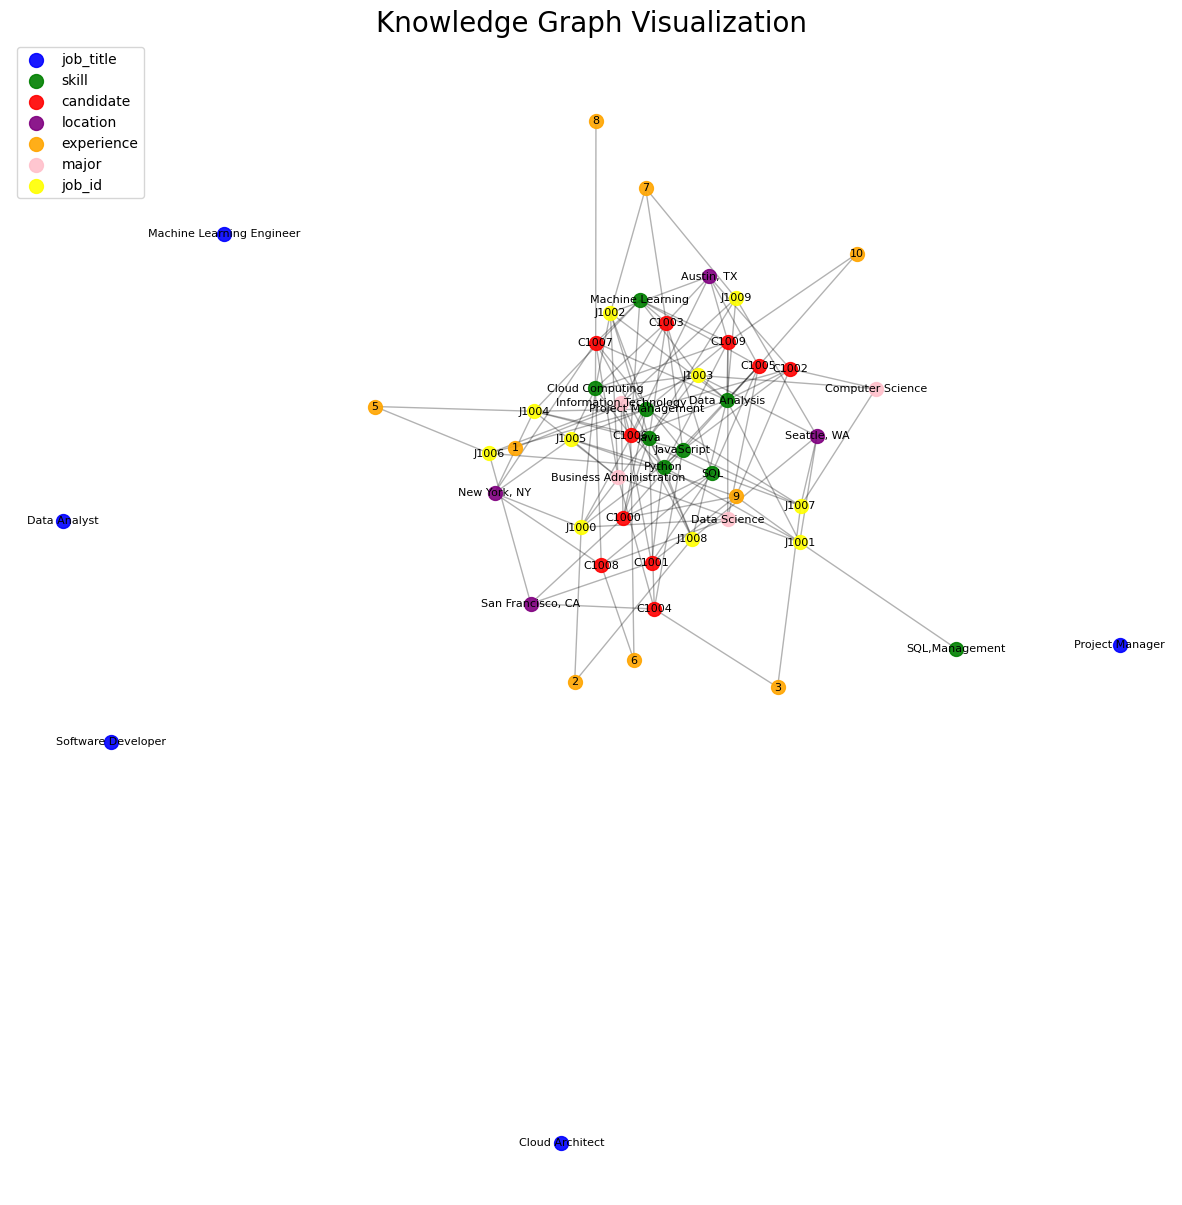

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'updated_graph_with_ids' is the already created NetworkX graph

# Define colors for different types of nodes
color_map = {
    'job_title': 'blue',
    'skill': 'green',
    'candidate': 'red',
    'location': 'purple',
    'experience': 'orange',
    'major': 'pink',
    'job_id': 'yellow'
}

# Generate a layout for our nodes
layout = nx.spring_layout(updated_graph_with_ids, k=0.15, iterations=20)

# Drawing the graph
plt.figure(figsize=(15, 15))
nx.draw_networkx_edges(updated_graph_with_ids, pos=layout, alpha=0.3)

for node_type, color in color_map.items():
    nx.draw_networkx_nodes(
        updated_graph_with_ids,
        pos=layout,
        nodelist=[n for n, attrdict in updated_graph_with_ids.nodes(data=True) if attrdict['type'] == node_type],
        node_color=color,
        label=node_type,
        node_size=100,
        alpha=0.9
    )

nx.draw_networkx_labels(updated_graph_with_ids, pos=layout, font_size=8, font_color='black')

# Show legend
plt.legend(loc='upper left', scatterpoints=1, fontsize=10)

# Show plot
plt.title("Knowledge Graph Visualization", fontsize=20)
plt.axis('off')
plt.show()


In [ ]:
def find_matching_jobs_for_candidate_based_on_experience(graph, candidate_id):
    # Extract the experience of the candidate
    candidate_experience = next((graph.nodes[n]['name'] for n, attr in graph.edges(candidate_id) if graph.nodes[n]['type'] == 'experience'), None)
    print(candidate_experience)
    suitable_jobs = set()
    for job_id in graph.nodes(data=True):
        if job_id[1]['type'] == 'job_id':
            job_experience = graph.nodes[job_id[0]]['experience']

            # Check if the candidate's experience matches the job's required experience
            if candidate_experience == job_experience:
                suitable_jobs.add(job_id[0])

    return suitable_jobs

# Finding matching jobs for a candidate based on experience
candidate_id = "C1001"  # Replace with the actual Candidate ID
matching_jobs = find_matching_jobs_for_candidate_based_on_experience(updated_graph_with_ids, candidate_id)

matching_jobs


None


set()

This below part constructs a knowledge graph visualization using NetworkX and Matplotlib, representing relationships among job titles, skills, candidates, locations, experiences, majors, and job postings. Datasets containing job postings and resumes are loaded, and a new graph is initialized. Nodes are added for job titles, skills, candidates, locations, experiences, and majors. Additionally, edges are established between nodes to capture relationships like skill requirements for jobs and skills possessed by candidates. A color map is defined to differentiate node types, and a spring layout algorithm is applied for node arrangement. The resulting graph is then visualized with color-coded nodes and edges, leveraging Matplotlib for rendering. The legend is included for reference, and the final graph is displayed with a title while omitting the axis for clarity.

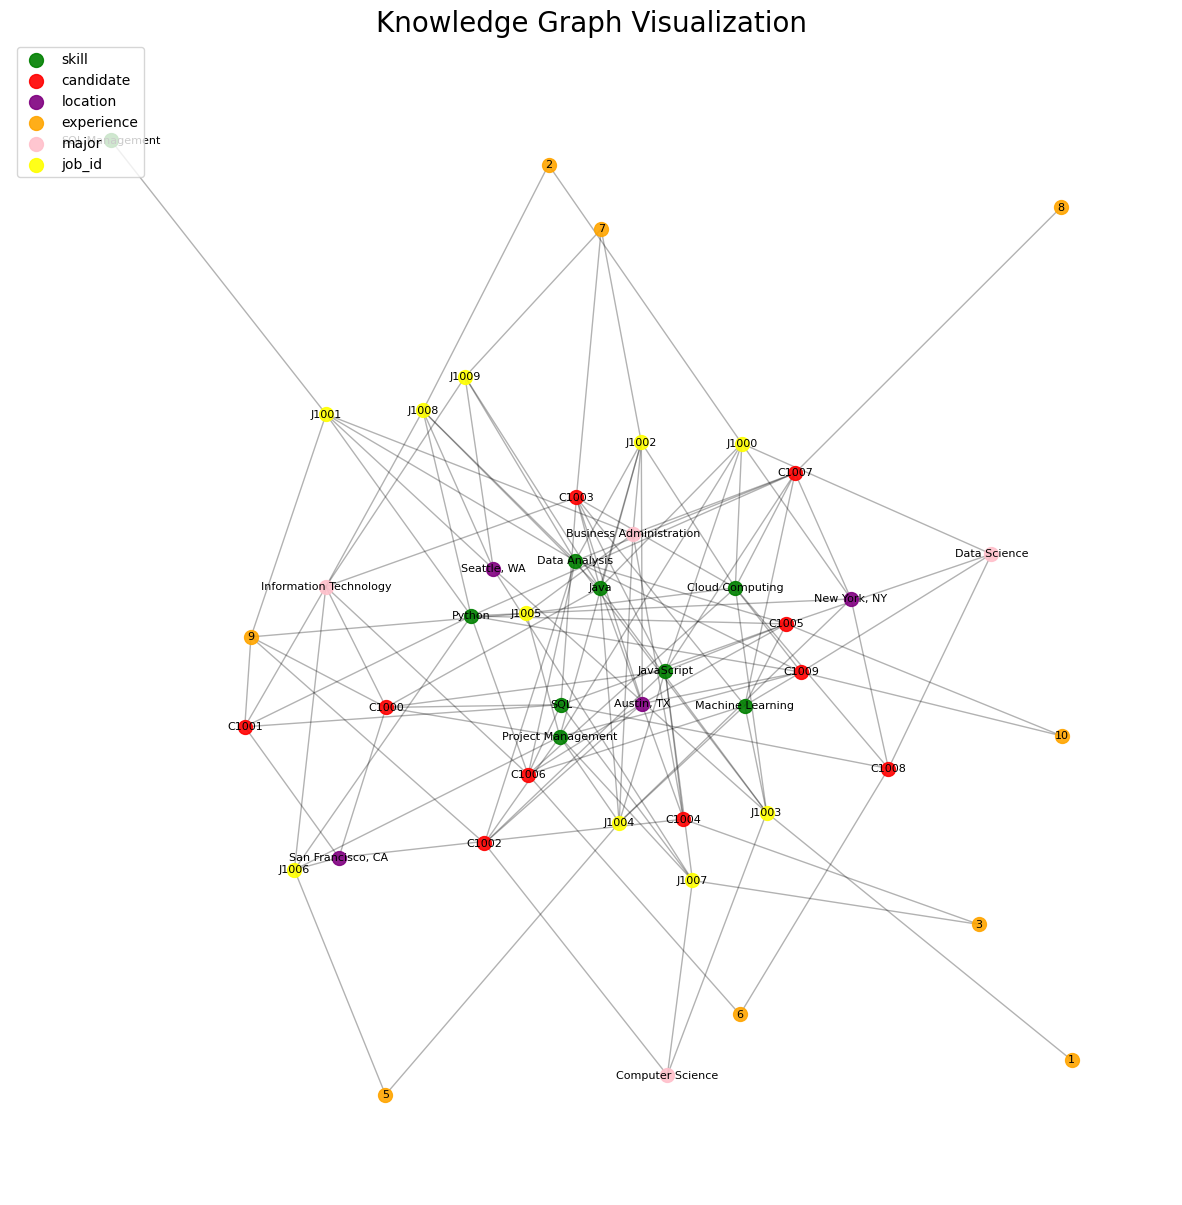

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the datasets
new_job_posting_df = pd.read_csv('/content/new_synthetic_job_posting_dataset.csv')
new_resume_df = pd.read_csv('/content/new_synthetic_resume_dataset.csv')

# Create a new graph
updated_graph_with_ids = nx.Graph()

# Adding nodes for job titles and skills from both datasets
for job_title in new_job_posting_df['Job Title'].unique():
    updated_graph_with_ids.add_node(job_title, type='job_title')

for skill in new_all_skills:
    updated_graph_with_ids.add_node(skill, type='skill')

# Adding nodes for candidates using Candidate ID
for _, row in new_resume_df.iterrows():
    updated_graph_with_ids.add_node(row['Candidate ID'], type='candidate', name=row['Name'])

# Adding nodes for other entities
for location in new_all_locations:
    updated_graph_with_ids.add_node(location, type='location')

for experience in new_all_experiences:
    updated_graph_with_ids.add_node(experience, type='experience')

for major in new_all_majors:
    updated_graph_with_ids.add_node(major, type='major')

# Adding nodes and edges for job postings
for _, row in new_job_posting_df.iterrows():
    job_id = row['Job ID']
    required_skills = row['Required Skills'].split(', ')
    experience_needed = row['Experience Needed']
    major = row['Major']
    location = row['Location']

    updated_graph_with_ids.add_node(job_id, type='job_id', title=row['Job Title'], major=major, location=location, experience=experience_needed)

    for skill in required_skills:
        updated_graph_with_ids.add_edge(job_id, skill, type='requires_skill')
    updated_graph_with_ids.add_edge(job_id, experience_needed, type='requires_experience')
    updated_graph_with_ids.add_edge(job_id, major, type='requires_major')
    updated_graph_with_ids.add_edge(job_id, location, type='located_at')

# Adding edges for candidates
for _, row in new_resume_df.iterrows():
    candidate_id = row['Candidate ID']
    for skill in row['Skills'].split(', '):
        updated_graph_with_ids.add_edge(candidate_id, skill, type='has_skill')
    updated_graph_with_ids.add_edge(candidate_id, row['Location'], type='located_at')
    updated_graph_with_ids.add_edge(candidate_id, row['Experience'], type='has_experience')
    updated_graph_with_ids.add_edge(candidate_id, row['Major'], type='has_major')

color_map = {
    'skill': 'green',
    'candidate': 'red',
    'location': 'purple',
    'experience': 'orange',
    'major': 'pink',
    'job_id': 'yellow',
    'candidate_id': 'blue'
}

# Generate a layout for our nodes
layout = nx.spring_layout(updated_graph_with_ids, k=0.15, iterations=20)

# Drawing the graph
plt.figure(figsize=(15, 15))
nx.draw_networkx_edges(updated_graph_with_ids, pos=layout, alpha=0.3)

for node_type, color in color_map.items():
    nx.draw_networkx_nodes(
        updated_graph_with_ids,
        pos=layout,
        nodelist=[n for n, attrdict in updated_graph_with_ids.nodes(data=True) if attrdict['type'] == node_type],
        node_color=color,
        label=node_type,
        node_size=100,
        alpha=0.9
    )

nx.draw_networkx_labels(updated_graph_with_ids, pos=layout, font_size=8, font_color='black')

# Show legend
plt.legend(loc='upper left', scatterpoints=1, fontsize=10)

# Show plot
plt.title("Knowledge Graph Visualization", fontsize=20)
plt.axis('off')
plt.show()



In this implementation section, the objective is to find the skills possessed by a candidate with the identifier "C1001" and subsequently identify jobs that require those skills. Initially, the target skill is defined as "C1001." The skills associated with this candidate are determined by iterating through the neighbors of "C1001" in the knowledge graph. The type of edge connecting the target skill to its neighbors is checked to ensure it represents a "has_skill" relationship. The identified skills are then printed.

Subsequently, a list named `matching_jobs` is initialized to store unique job IDs that require any of the skills possessed by "C1001." A nested loop is employed to iterate through each skill of "C1001" and find jobs that necessitate that skill. The type of edge connecting the skill to the job is checked to ensure it corresponds to a "requires_skill" relationship, and redundant jobs are avoided in the `matching_jobs` list.

Finally, the code prints the list of jobs that require the skills of "C1001," displaying relevant details such as job title and ID for each matching job. This process facilitates a targeted exploration of job opportunities based on the candidate's skill set.

In [ ]:
# Define the skill you want to find
target_skill = "C1001"

# Find the skills of "C1001"
skills_of_c1001 = []
for neighbor in updated_graph_with_ids.neighbors(target_skill):
    if updated_graph_with_ids[target_skill][neighbor]['type'] == 'has_skill':
        skills_of_c1001.append(neighbor)

# List the skills of "C1001"
print(f"Skills of {target_skill}: {', '.join(skills_of_c1001)}")

# Match the skills of "C1001" with jobs
matching_jobs = []
for skill in skills_of_c1001:
    for job in updated_graph_with_ids.neighbors(skill):
        if updated_graph_with_ids[skill][job]['type'] == 'requires_skill' and job not in matching_jobs:
            matching_jobs.append(job)

# List the jobs that require the skills of "C1001"
print(f"Jobs that require the skills of {target_skill}:")
for job_id in matching_jobs:
    job_data = updated_graph_with_ids.nodes[job_id]
    print(f"Job Title: {job_data['title']}, Job ID: {job_id}")


Skills of C1001: Python, SQL
Jobs that require the skills of C1001:
Job Title: Machine Learning Engineer, Job ID: J1001
Job Title: Data Analyst, Job ID: J1005
Job Title: Project Manager, Job ID: J1006
Job Title: Software Developer, Job ID: J1008
Job Title: Software Developer, Job ID: J1007


Now the  the objective is to find and list the skills associated with a candidate identified by the skill code "C1001" in the knowledge graph. The process involves iterating through the neighbors of "C1001" within the graph and checking the type of edge connecting the target skill to its neighbors. Specifically, the code verifies whether the edge type is "has_skill," indicating a relationship where the candidate possesses a certain skill. For each neighbor that satisfies this condition, the associated skill is appended to the list `skills_of_c1001`.

The result is then printed, displaying the skills of "C1001" in a human-readable format. This code segment enables the extraction and presentation of the candidate's skills, providing valuable information for assessing their qualifications and potential suitability for specific job opportunities or other relevant contexts.

In [ ]:
# Define the skill you want to find
target_skill = "C1001"

# Find the skills of "C1001" from the graph
skills_of_c1001 = []

# Iterate through the neighbors of "C1001"
for neighbor in updated_graph_with_ids.neighbors(target_skill):
    # Check if the edge type is "has_skill"
    if updated_graph_with_ids[target_skill][neighbor]['type'] == 'has_skill':
        # Append the skill to the list
        skills_of_c1001.append(neighbor)

# List the skills of "C1001"
print(f"Skills of {target_skill}: {', '.join(skills_of_c1001)}")


Skills of C1001: Python, SQL


Now coninuing the process for skill code 'C1001', The below process involves iterating through the neighbors of "C1001" within the graph and checking the type of edge connecting the target skill to its neighbors. Specifically, the code verifies whether the edge type is "has_experience," indicating a relationship where the candidate possesses certain professional experience.

If such an edge is found, the corresponding experience information is extracted and stored in the variable `experience_of_c1001`. Subsequently, the code checks whether the experience information was successfully obtained. If the information is available, it is printed to the console, providing insights into the candidate's relevant work or professional background. In case no experience data is found for the specified skill code, a corresponding message is printed, indicating the absence of such information in the knowledge graph. This code segment facilitates the retrieval of crucial experience details for a candidate, aiding in the assessment of their suitability for specific roles or contexts.

In [ ]:
# Define the skill you want to find
target_skill = "C1001"

# Find the experience of the same person "C1001" from the graph
experience_of_c1001 = None

# Iterate through the neighbors of "C1001"
for neighbor in updated_graph_with_ids.neighbors(target_skill):
    # Check if the edge type is "has_experience"
    if updated_graph_with_ids[target_skill][neighbor]['type'] == 'has_experience':
        # Extract the experience
        experience_of_c1001 = neighbor

# Check if experience was found and print it
if experience_of_c1001 is not None:
    print(f"Experience of {target_skill}: {experience_of_c1001}")
else:
    print(f"Experience data not found for {target_skill}")


Experience of C1001: 9


In this part, The job is to first extracting the skills and experience linked to "C1001" by iterating through its neighbors in the graph. The skills are collected, and the candidate's experience information is obtained.

Subsequently, a subset of skills to match, denoted by "skills_to_match," is defined. The code then iterates through the jobs in the graph, checking if they match at least one of the specified skills and the candidate's experience. This is achieved by examining the edges between the job and the skills/experience of "C1001." Matching jobs are stored in the list "matching_jobs."

Finally, the code prints the jobs that match at least one skill and the experience of "C1001," providing details such as the job title, major, location, and required experience. This functionality facilitates the identification of relevant job opportunities that align with the skills and experience of a specific candidate, aiding in the job-seeking or talent-matching process.

In [ ]:
# Define the skill you want to find
target_skill = "C1001"

# Find the skills of "C1001" from the graph
skills_of_c1001 = []

# Iterate through the neighbors of "C1001"
for neighbor in updated_graph_with_ids.neighbors(target_skill):
    # Check if the edge type is "has_skill"
    if updated_graph_with_ids[target_skill][neighbor]['type'] == 'has_skill':
        # Append the skill to the list
        skills_of_c1001.append(neighbor)

# Find the experience of the same person "C1001" from the graph
experience_of_c1001 = None

# Iterate through the neighbors of "C1001"
# Define the skill you want to find
target_skill = "C1001"

# Define the subset of skills to match (add the skills you want to match)
skills_to_match = ["Skill1", "Skill2", "Skill3"]

# Find the skills of "C1001" from the graph
skills_of_c1001 = []

# Iterate through the neighbors of "C1001"
for neighbor in updated_graph_with_ids.neighbors(target_skill):
    # Check if the edge type is "has_skill"
    if updated_graph_with_ids[target_skill][neighbor]['type'] == 'has_skill':
        # Append the skill to the list
        skills_of_c1001.append(neighbor)

# Find the experience of the same person "C1001" from the graph
experience_of_c1001 = None

# Iterate through the neighbors of "C1001"
for neighbor in updated_graph_with_ids.neighbors(target_skill):
    # Check if the edge type is "has_experience"
    if updated_graph_with_ids[target_skill][neighbor]['type'] == 'has_experience':
        # Extract the experience
        experience_of_c1001 = neighbor

# Check if experience was found and print it
if experience_of_c1001 is not None:
    print(f"Experience of {target_skill}: {experience_of_c1001}")
else:
    print(f"Experience data not found for {target_skill}")

# Find jobs that match at least one of the specified skills and experience of "C1001" from the graph
matching_jobs = []

# Iterate through the jobs in your graph
for _, job_data in updated_graph_with_ids.nodes(data=True):
    if (
        job_data['type'] == 'job_id' and
        any(updated_graph_with_ids.has_edge(job_data['title'], skill) for skill in skills_of_c1001) and
        updated_graph_with_ids.has_edge(job_data['title'], experience_of_c1001)
    ):
        matching_jobs.append(job_data)

# List the jobs that match at least one skill and experience of "C1001"
print(f"Jobs that match at least one skill and experience of {target_skill}:")
for job in matching_jobs:
    print(f"Job Title: {job['title']}, Major: {job['major']}, Location: {job['location']}, Experience: {job['experience']}")


Experience of C1001: 9
Jobs that match at least one skill and experience of C1001:


This final segment of the code focuses on finding and matching jobs based on the skills and experience associated with the specified skill code "C1001" in the knowledge graph. The initial part of the code identifies and lists the skills and experience linked to "C1001" by iterating through its neighbors. The skills are collected into the list "skills_of_c1001," and the candidate's experience information is obtained and stored in the variable "experience_of_c1001."

Subsequently, the code proceeds to match the skills and experience of "C1001" with jobs in the knowledge graph. It iterates through the skills of "C1001," then checks each job associated with these skills. Matching jobs are identified based on specific conditions: the job requires the matched skill, has an edge linking it to the candidate's experience, and is not already in the list of matching jobs.

Finally, the code prints the jobs that require both the skills and experience of "C1001," providing details such as the job title and job ID. This functionality aids in identifying job opportunities that align with the specific skills and experience of a candidate, providing valuable insights for career exploration and job matching within the knowledge graph.

In [ ]:
# Define the skill you want to find
target_skill = "C1001"

# Find the skills of "C1001"
skills_of_c1001 = []
for neighbor in updated_graph_with_ids.neighbors(target_skill):
    if updated_graph_with_ids[target_skill][neighbor]['type'] == 'has_skill':
        skills_of_c1001.append(neighbor)

# Find the experience of "C1001"
experience_of_c1001 = None
for neighbor in updated_graph_with_ids.neighbors(target_skill):
    if updated_graph_with_ids[target_skill][neighbor]['type'] == 'has_experience':
        experience_of_c1001 = neighbor

# List the skills of "C1001"
print(f"Skills of {target_skill}: {', '.join(skills_of_c1001)}")
print(f"Experience of {target_skill}: {experience_of_c1001}")

# Match the skills and experience of "C1001" with jobs
matching_jobs = []
for skill in skills_of_c1001:
    for job in updated_graph_with_ids.neighbors(skill):
        if (
            updated_graph_with_ids[skill][job]['type'] == 'requires_skill' and
            updated_graph_with_ids.has_edge(job, experience_of_c1001) and
            job not in matching_jobs
        ):
            matching_jobs.append(job)

# List the jobs that require the skills and experience of "C1001"
print(f"Jobs that require the skills and experience of {target_skill}:")
for job_id in matching_jobs:
    job_data = updated_graph_with_ids.nodes[job_id]
    print(f"Job Title: {job_data['title']}, Job ID: {job_id}")


Skills of C1001: Python, SQL
Experience of C1001: 9
Jobs that require the skills and experience of C1001:
Job Title: Machine Learning Engineer, Job ID: J1001
Job Title: Data Analyst, Job ID: J1005


In [3]:
!pip install neo4j
import pandas as pd
from neo4j import GraphDatabase

uri = "neo4j+s://68a3ea64.databases.neo4j.io"
username = "neo4j"
password = "tgRxNc1xksKPESo2Nci8e_MKOw1jEKUFPMneUOWxbnw"

jobs_df = pd.read_csv('/content/new_synthetic_job_posting_dataset.csv')
candidates_df = pd.read_csv('/content/new_synthetic_resume_dataset.csv')
# Connect to the Neo4j database
with GraphDatabase.driver(uri, auth=(username, password)) as driver:
    with driver.session() as session:
        # Create nodes for jobs
        for index, job in jobs_df.iterrows():
            create_job_query = """
                MERGE (j:Job {job_id: $job_id, title: $title, skills: $skills, experience: $experience, major: $major, location: $location})
            """
            session.run(create_job_query, job_id=job['Job ID'], title=job['Job Title'], skills=job['Required Skills'], experience=job['Experience Needed'], major=job['Major'], location=job['Location'])

        # Create nodes for candidates
        for index, candidate in candidates_df.iterrows():
            create_candidate_query = """
                MERGE (c:Candidate {candidate_id: $candidate_id, name: $name, skills: $skills, experience: $experience, major: $major, location: $location})
            """
            session.run(create_candidate_query, candidate_id=candidate['Candidate ID'], name=candidate['Name'], skills=candidate['Skills'], experience=candidate['Experience'], major=candidate['Major'], location=candidate['Location'])

        # Create relationships based on common attributes
        create_relationship_query = """
            MATCH (j:Job), (c:Candidate)
            WHERE j.skills CONTAINS c.skills
                AND j.experience >= c.experience
                AND j.location = c.location
            MERGE (j)-[:REQUIRES_COMMON_ATTRIBUTES]->(c)
        """
        session.run(create_relationship_query)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for neo4j: filename=neo4j-5.17.0-py3-none-any.whl size=273834 sha256=0a285361e0618888a8984f6878cea360932b1afaf47b1f62182713f8acb2ce54
  Stored in directory: /root/.cache/pip/wheels/26/a1/15/63d729065b1a6a8afce3343003ca05bdbed2c4c05a707da4a3
Successfully built neo4j
